In [87]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [88]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [89]:
# Check for duplicates   
if len(train.TrainId) == len(set(train.TrainId)):
    print "no duplicates"
else:
    print "duplicates"
train = train.drop("TrainId", axis = 1)

no duplicates


In [90]:
train = train.ix[~((train.GrLivArea>4000) & (train.SalePrice<300000))]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [91]:
train_labels = train.SalePrice
train_features = train.drop(['SalePrice'],axis=1)

In [92]:
train_features.Alley = train_features.Alley.fillna("None")
train_features.BedroomAbvGr = train_features.BedroomAbvGr.fillna(0)
train_features.BsmtQual = train_features.BsmtQual.fillna("No")
train_features.BsmtCond = train_features.BsmtCond.fillna("No")
train_features.BsmtExposure = train_features.BsmtExposure.fillna("No")
train_features.BsmtFinType1 = train_features.BsmtFinType1.fillna("No")
train_features.BsmtFinType2 = train_features.BsmtFinType2.fillna("No")
train_features.BsmtFullBath = train_features.BsmtFullBath.fillna(0)
train_features.BsmtHalfBath = train_features.BsmtHalfBath.fillna(0)
train_features.BsmtUnfSF = train_features.BsmtUnfSF.fillna(0)


In [93]:
train_features.Alley = train_features.Alley.replace(["None","Grvl","Pave"],[0,1,2])
train_features.BsmtQual = train_features.BsmtQual.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.BsmtCond = train_features.BsmtCond.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
train_features.BsmtExposure = train_features.BsmtExposure.replace(["No","Mn","Av","Gd"],[0,1,2,3])
train_features.BsmtFinType1 = train_features.BsmtFinType1.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])
train_features.BsmtFinType2 = train_features.BsmtFinType2.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])



In [94]:
train_features = train_features[['GrLivArea','Alley','BedroomAbvGr','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF']]
train_features.columns.size

11

In [95]:
# Get data
test = pd.read_csv("test.csv")
print("test : " + str(test.shape))

test : (1459, 80)


In [96]:
# Check for duplicates   
if len(test.Id) == len(set(test.Id)):
    print "no duplicates"
else:
    print "duplicates"
test = test.drop("Id", axis = 1)

no duplicates


In [97]:
test.Alley = test.Alley.fillna("None")
test.BedroomAbvGr = test.BedroomAbvGr.fillna(0)
test.BsmtQual = test.BsmtQual.fillna("No")
test.BsmtCond = test.BsmtCond.fillna("No")
test.BsmtExposure = test.BsmtExposure.fillna("No")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No")
test.BsmtFullBath = test.BsmtFullBath.fillna(0)
test.BsmtHalfBath = test.BsmtHalfBath.fillna(0)
test.BsmtUnfSF = test.BsmtUnfSF.fillna(0)

In [98]:
test.Alley = test.Alley.replace(["None","Grvl","Pave"],[0,1,2])
test.BsmtQual = test.BsmtQual.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.BsmtCond = test.BsmtCond.replace(["No","Po","Fa","TA","Gd","Ex"],[0,1,2,3,4,5])
test.BsmtExposure = test.BsmtExposure.replace(["No","Mn","Av","Gd"],[0,1,2,3])
test.BsmtFinType1 = test.BsmtFinType1.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])
test.BsmtFinType2 = test.BsmtFinType2.replace(["No" ,"Unf","LwQ","Rec","BLQ","ALQ","GLQ"],[0,1,2,3,4,5,6])

In [99]:
test_features = test[['GrLivArea','Alley','BedroomAbvGr','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF']]
test_features.columns.size

11

In [100]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)

(1458, 11)
(1458,)
(1459, 11)


In [101]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
train_labels_pred = lr.predict(train_features)
test_labels_pred = lr.predict(test_features)
print(train_labels_pred.shape)
print(test_labels_pred.shape)

(1458,)
(1459,)


In [103]:
print(train_labels.values)
print(train_labels_pred)

[208500 181500 223500 ..., 266500 142125 147500]
[ 217902.29398169  191455.07809627  241639.09621579 ...,  227836.59463235
  142342.39576961  130347.2806873 ]


In [104]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, train_features, train_labels, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, test_features, test_labels_pred, scoring = scorer, cv = 10))
    return(rmse)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

('RMSE on Training set :', 39264.589054881093)
('RMSE on Test set :', 7.8916179277851933e-10)


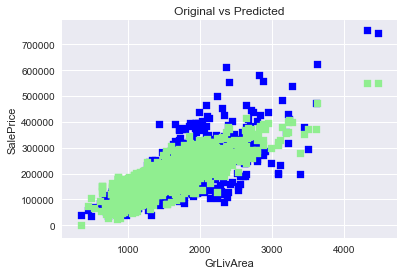

In [105]:
# Plot predictions
plt.scatter(train_features.GrLivArea, train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(train_features.GrLivArea, train_labels_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Original vs Predicted")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()